## Final Project Submission

Please fill out:
* Student name: Alice Jebiwott (Group 17)
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Samwel Jane
* Blog post URL:


## Project Overview
In this project, we will employ multiple linear regression modeling to gain valuable insights into house sales within Hilton in Northwestern County. The utilization of advanced statistical techniques will allow us to explore and understand the multifaceted relationships between various independent variables and house prices. By analyzing historical sales data, we aim to create a robust predictive model that can assist in estimating house prices, identifying key factors influencing property values, and ultimately providing valuable information to homeowners, real estate professionals, and other stakeholders in the housing market.

![superb](https://t4.ftcdn.net/jpg/03/00/10/35/360_F_300103505_oBLUa4dEG8mFdP60givbyNdoy7aHFmuu.jpg)

### Business Problem
The real estate market in Hilton, Northwestern County is grappling with a lack of precise insights into the intricate factors influencing house prices. Homeowners, real estate agents, and property investors face challenges in accurately estimating property values and understanding the specific features that contribute significantly to house prices. The absence of a data-driven approach hampers informed decision-making, resulting in suboptimal property transactions, missed opportunities, and potentially undervalued or overpriced homes. The business problem at hand is the need for a systematic analysis using multiple linear regression modeling to unravel the complexities of house prices, identify influential variables, and provide stakeholders with a reliable tool to enhance the accuracy of property valuation and decision-making processes in the northwestern county's real estate market.

### The Data
This project uses the King County House Sales dataset, `kc_house_data.csv`, which comprises of various variables that affect house sales prices. The independent variables that will be used in the dataset include bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition,	grade and yr_built.  

**Import Libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Dataset**

In [6]:
house_df = pd.read_csv ("kc_house_data.csv")

### Explporatory Data Analysis
This step is important in understanding the characteristics of our dataset before applying multiple linear regression modeling

**Basic Data Exploration**

In [7]:
#To see the characteristics of the rows in the dataset
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Display summary statistics of numerical features
print(house_df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761    

In [8]:
# Check for missing values
house_df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# Display basic information about the dataset
house_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Visualize Data Distributions**

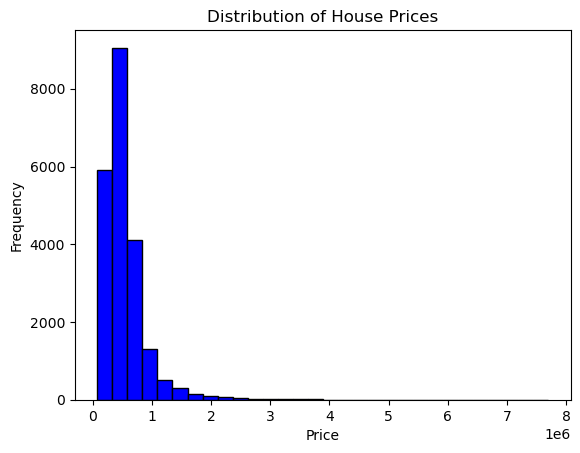

In [21]:
# Histogram for house sale prices
plt.hist(house_df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

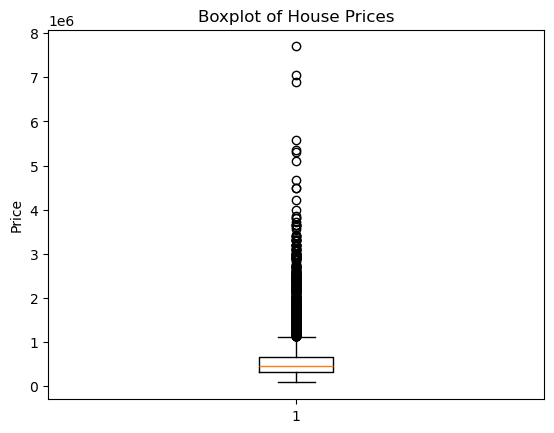

In [20]:
# Boxplot for house prices to detect outliers
plt.boxplot(house_df['price'])
plt.title('Boxplot of House Prices')
plt.ylabel('Price')
plt.show()

C:\Users\CHEBBY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


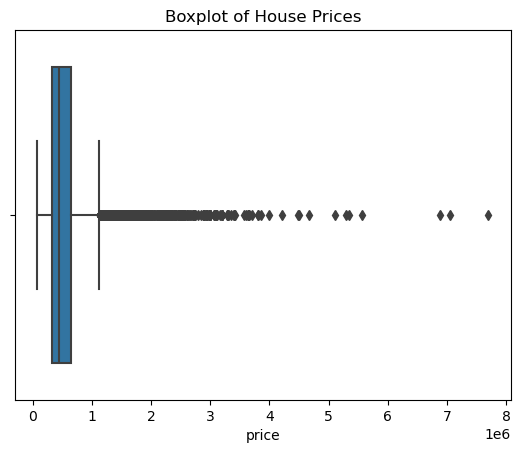

In [25]:
# Boxplot for detecting outliers
sns.boxplot(x=house_df['price'])
plt.title('Boxplot of House Prices')
plt.show()

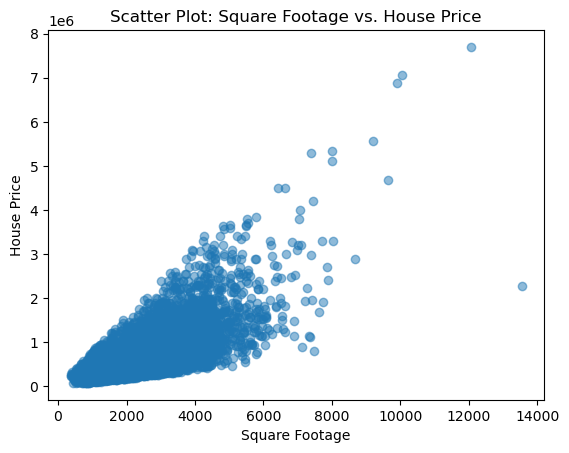

In [23]:
# Scatter plot for square footage and sale price
plt.scatter(house_df['sqft_living'], house_df['price'], alpha=0.5)
plt.title('Scatter Plot: Square Footage vs. House Price')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()

**Correlation Analysis**

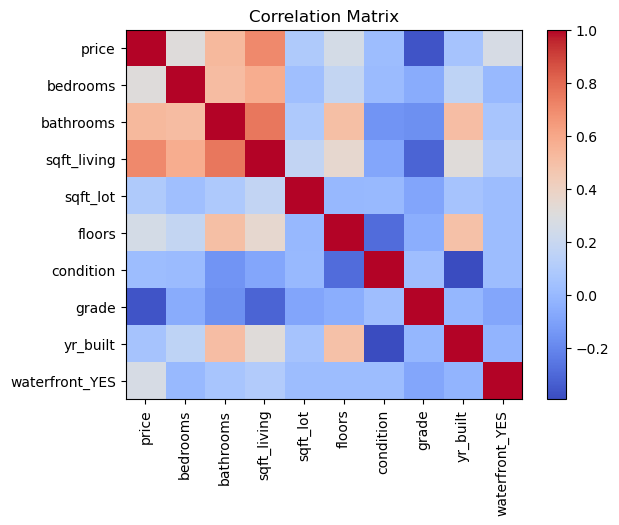

In [63]:
# Correlation matrix
correlation_matrix = house_df.corr()

# Heatmap for visualization
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

### Data Cleaning and Feature Engineering

In [ ]:
#Eliminate features that do not contribute to the analysis
house_df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id'], axis=1, inplace=True)

In [36]:
#Check the new DataFrame
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [38]:
#Check for duplicates if any
house_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [39]:
#Remove duplicates if any
house_df.drop_duplicates(inplace=True)

In [40]:
# Check for missing values
house_df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [41]:
#Replace null values with mode
x = house_df['waterfront'].mode()[0]
house_df['waterfront'].fillna(x, inplace=True)

In [42]:
#Check the data for any other null values
house_df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [ ]:
#Convert 'waterfront' categorical variable into dummy variables
house_df = pd.get_dummies(house_df, columns = ['waterfront'], drop_first=True)

In [44]:
#Check the new DataFrame
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_YES
0,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,False
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,False
2,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,False
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,False
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,False
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,2009,False
21593,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2014,False
21594,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,2009,False
21595,400000.0,3,2.50,1600,2388,2.0,Average,8 Good,2004,False


In [60]:
#Check for unique values in waterfront_YES column
house_df['waterfront_YES'].unique()

array([False,  True])

In [54]:
#Check for unique values in grade column
house_df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [55]:
#check for unique values in condition column
house_df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [56]:
#Transform categorical variables 'condition' to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
house_df['condition'] = le.fit_transform(house_df['condition'])

In [57]:
#Transform grade categorical variable to numeric values
house_df['grade'] = le.fit_transform(house_df['grade'])

In [58]:
#check the columns of the new DataFrame
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_YES
0,221900.0,3,1.00,1180,5650,1.0,0,8,1955,False
1,538000.0,3,2.25,2570,7242,2.0,0,8,1951,False
2,180000.0,2,1.00,770,10000,1.0,0,7,1933,False
3,604000.0,4,3.00,1960,5000,1.0,4,8,1965,False
4,510000.0,3,2.00,1680,8080,1.0,0,9,1987,False
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,9,2009,False
21593,400000.0,4,2.50,2310,5813,2.0,0,9,2014,False
21594,402101.0,2,0.75,1020,1350,2.0,0,8,2009,False
21595,400000.0,3,2.50,1600,2388,2.0,0,9,2004,False


In [61]:
#Convert the boolean values in the waterfron column to intergers
house_df.replace({False: 0, True: 1}, inplace=True)

In [62]:
#Check the columns of the new DataFrame
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_YES
0,221900.0,3,1.00,1180,5650,1.0,0,8,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,8,1951,0
2,180000.0,2,1.00,770,10000,1.0,0,7,1933,0
3,604000.0,4,3.00,1960,5000,1.0,4,8,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,9,1987,0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,9,2009,0
21593,400000.0,4,2.50,2310,5813,2.0,0,9,2014,0
21594,402101.0,2,0.75,1020,1350,2.0,0,8,2009,0
21595,400000.0,3,2.50,1600,2388,2.0,0,9,2004,0


In [65]:
#Scale numerical features to ensure all variables are on a similar scale
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 'waterfront_YES']] = scaler.fit_transform(house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 'waterfront_YES']])


In [91]:
#Check the DataFrame after scaling
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_YES
0,-0.866628,-0.402975,-1.450809,-0.980663,-0.228250,-0.915352,-0.673296,0.076080,-0.544315,-0.082513
1,-0.006284,-0.402975,0.174534,0.533192,-0.189812,0.938188,-0.673296,0.076080,-0.680506,-0.082513
2,-0.980669,-1.482543,-1.450809,-1.427195,-0.123222,-0.915352,-0.673296,-0.357657,-1.293365,-0.082513
3,0.173351,0.676592,1.149740,-0.131162,-0.243944,-0.915352,2.484229,0.076080,-0.203838,-0.082513
4,-0.082493,-0.402975,-0.150534,-0.436111,-0.169579,-0.915352,-0.673296,0.509816,0.545211,-0.082513


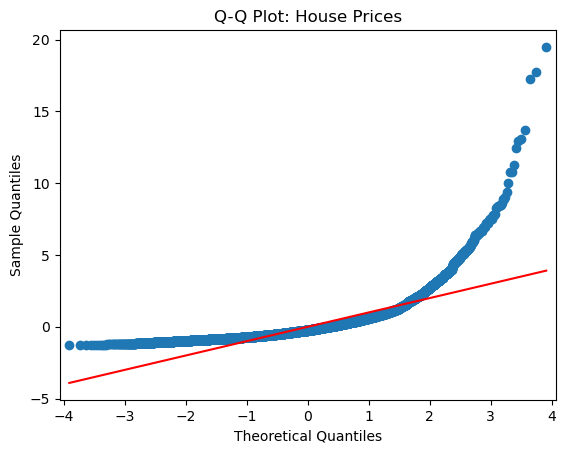

In [66]:
#Check for normality
#Use a Q-Q plot to compare the distribution of the data against a theoretical normal distribution.
import statsmodels.api as sm
import scipy.stats as stats

# Q-Q plot for house sale prices
sm.qqplot(house_df['price'], line='s')
plt.title('Q-Q Plot: House Prices')
plt.show()

#The points in the Q-Q plot does not closely follow the diagonal line, this indicates that the sample data is skewed

In [67]:
#Conduct another statistical test using the Shapiro-Wilk test, to formally assess normality
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(house_df['price'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')


Shapiro-Wilk Test Statistic: 0.7117804884910583, p-value: 0.0
Data does not look normally distributed (reject H0)


C:\Users\CHEBBY\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Multiple Linear Regression

**Import Necessary Libraries**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Define X and y**

In [97]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = house_df.drop('price', axis=1).values
y = house_df['price'].values
print(X)
print (y)

[[-0.40297519 -1.45080881 -0.98066265 ...  0.07607965 -0.54431542
  -0.08251322]
 [-0.40297519  0.1745343   0.5331917  ...  0.07607965 -0.68050625
  -0.08251322]
 [-1.48254268 -1.45080881 -1.42719523 ... -0.35765674 -1.29336495
  -0.08251322]
 ...
 [-1.48254268 -1.77587743 -1.15491927 ...  0.07607965  1.29426069
  -0.08251322]
 [-0.40297519  0.49960292 -0.52323904 ...  0.50981605  1.12402217
  -0.08251322]
 [-1.48254268 -1.77587743 -1.15491927 ...  0.07607965  1.26021299
  -0.08251322]]
[-0.86662765 -0.00628395 -0.98066878 ... -0.37616642 -0.38188481
 -0.58601571]


**Split the Dataset into Training and Test Sets**

In [98]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


**Fit Linear Regression Model to the Training Set**

In [99]:
# Create a multiple linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

**Predict the Test Set Results**

In [80]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print (y_pred)

[ 1.83233959 -0.09433576 -0.31739712 ... -0.08185279 -0.56110549
 -0.25872299]


In [93]:
model.predict([[-0.402975, -1.450809, -0.980663, -0.228250, -0.915352, -0.673296, 0.076080, -0.544315, -0.082513]])

C:\Users\CHEBBY\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.78732063])

**Evaluate the Model**

In [81]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.39349730912294884
R-squared: 0.5920215745242756


In [94]:
r2_score(y_test, y_pred)

0.5920215745242756

**Inspect Coefficients and Intercept**

In [82]:
# Display coefficients and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
intercept = model.intercept_

print('Coefficients:')
print(coefficients)
print('\nIntercept:', intercept)

#The coefficients represent the change in the target variable (house prices) for a one-unit 
#change in the corresponding predictor variable,while keeping other variables constant.


Coefficients:
         Variable  Coefficient
0        bedrooms    -0.138687
1       bathrooms     0.128565
2     sqft_living     0.680054
3        sqft_lot    -0.037360
4          floors     0.081415
5       condition     0.033400
6           grade    -0.121646
7        yr_built    -0.225732
8  waterfront_YES     0.188745

Intercept: 0.0006630919216360238


**Plot the Results**

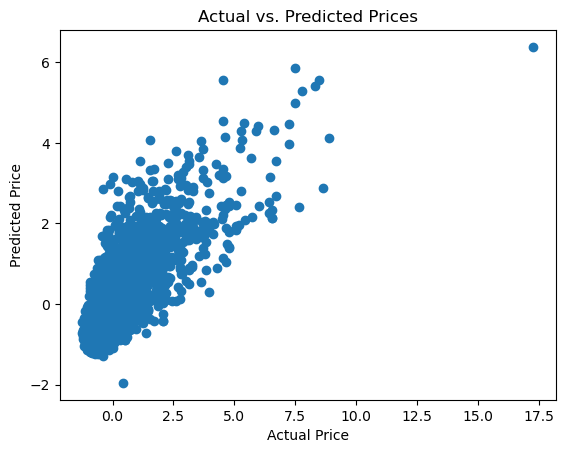

In [84]:
#Visualize the predicted values against the actual values using a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()


**Predict Values**

In [96]:
pred_y_df = pd.DataFrame ({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_y_df

,Actual Value,Predicted Value,Difference
9534,-0.136928,1.832340,-1.969267
798,-0.191363,-0.094336,-0.097027
913,-0.588737,-0.317397,-0.271340
11004,-0.282541,0.449068,-0.731609
10544,-0.273015,-0.146542,-0.126473
20548,0.257725,0.056358,0.201367
14319,-0.508446,0.546249,-1.054695
5590,-0.011727,-0.306962,0.295235
69,2.149338,0.475605,1.673734
16808,-0.433598,0.326314,-0.759912


**Check for assumptions (linearity, independence, homoscedasticity, and normality**

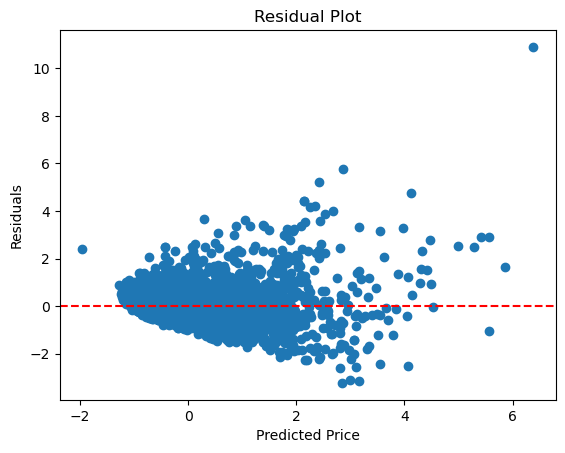

In [85]:
# Use residual plot to assess if the assumptions of linear regression are met 
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

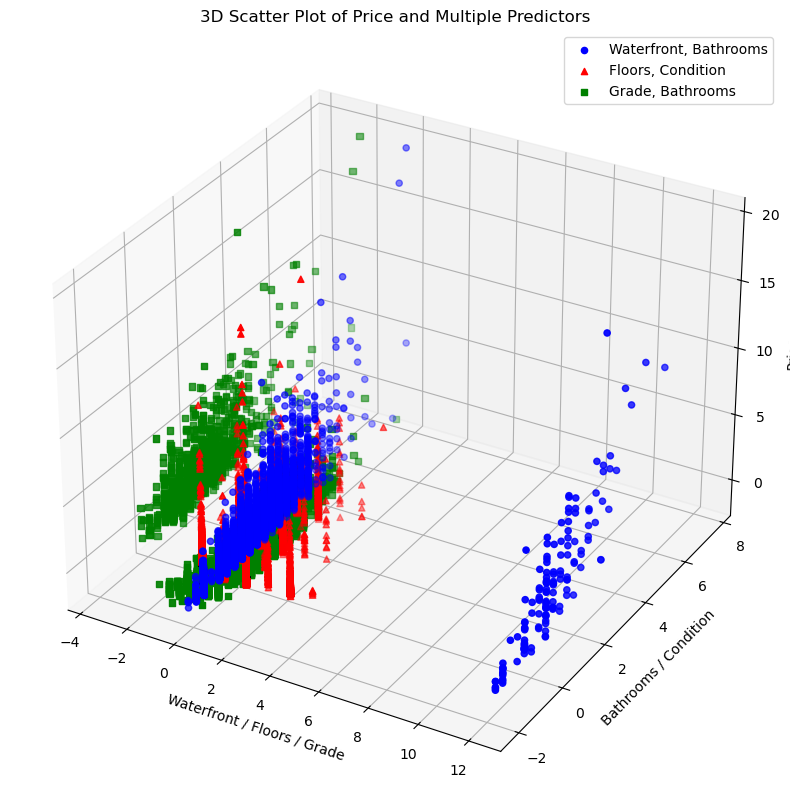

In [103]:
# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(house_df['waterfront_YES'], house_df['bathrooms'], house_df['price'], c='blue', marker='o', label='Waterfront, Bathrooms')
ax.scatter(house_df['floors'], house_df ['condition'], house_df['price'], c='red', marker='^', label='Floors, Condition')
ax.scatter(house_df['grade'], house_df['bathrooms'], house_df['price'], c='green', marker='s', label='Grade, Bathrooms')

ax.set_xlabel('Waterfront / Floors / Grade')
ax.set_ylabel('Bathrooms / Condition')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Price and Multiple Predictors')
ax.legend()

plt.show()